# **Import all Required Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import warnings; warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Data Importing**

In [34]:
df = pd.read_csv('/content/Diet_Recommendation_df.csv')
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation,BMI_Category,Glucose_Category,BP_Category,Cholesterol_Risk_Level,BMR,Activity_Factor,TDEE,Calorie_Balance,Calorie_Status,Exercise_Category,Sedentary_Risk_Flag,Health_Risk_Score,Health_Risk_Level,Age_Group
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced,Normal,Prediabetic,Stage-1 Hypertension,Desirable,1309.00,1.55,2028.9500,1050.0500,Surplus,Moderate,No,5.417833,Moderate,Late_Middle_Age
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb,Obese,Diabetic,Elevated,Desirable,1728.25,1.55,2678.7875,353.2125,Surplus,Moderate,No,6.907000,High,Senior
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium,Normal,Prediabetic,Elevated,Desirable,1325.25,1.20,1590.3000,146.7000,Balanced,Moderate,No,5.129333,Moderate,Late_Middle_Age
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced,Normal,Diabetic,Stage-2 Hypertension,Desirable,1451.00,1.55,2249.0500,407.9500,Surplus,Moderate,No,5.795000,Moderate,Early_Middle_Age
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb,Normal,Diabetic,Stage-2 Hypertension,Borderline High,1731.25,1.20,2077.5000,1418.5000,Surplus,High,No,6.308333,High,Late_Middle_Age


# **Exploratory Data analysis**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [37]:
df.shape

(1000, 34)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.857000,18.114267,18.000000,35.000000,50.000000,66.000000,79.00000
Weight_kg,1000.0,84.602400,20.088121,50.000000,66.600000,85.200000,102.000000,119.70000
Height_cm,1000.0,174.817000,14.333770,150.000000,162.000000,175.000000,187.000000,199.00000
BMI,1000.0,28.191600,8.040136,13.000000,22.075000,27.450000,33.425000,52.40000
Daily_Caloric_Intake,1000.0,2475.064000,565.017032,1500.000000,1984.750000,2470.500000,2937.250000,3498.00000
Cholesterol_mg/dL,1000.0,199.717900,29.080614,150.400000,174.300000,199.850000,224.850000,249.90000
Blood_Pressure_mmHg,1000.0,144.993000,20.245712,110.000000,128.000000,145.000000,163.000000,179.00000
Glucose_mg/dL,1000.0,136.867600,37.934819,70.200000,105.000000,138.000000,170.650000,200.00000
Weekly_Exercise_Hours,1000.0,5.166000,2.847995,0.000000,2.800000,5.200000,7.600000,10.00000
Adherence_to_Diet_Plan,1000.0,74.884300,14.826380,50.000000,62.000000,74.200000,88.200000,100.00000


In [39]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

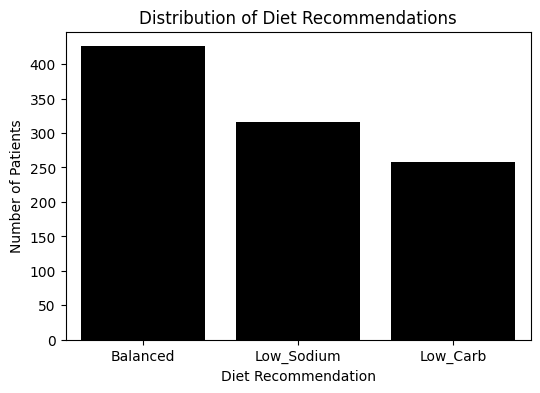

In [40]:
diet_counts = df['Diet_Recommendation'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=diet_counts.index, y=diet_counts.values, color='black')
plt.title("Distribution of Diet Recommendations")
plt.xlabel("Diet Recommendation")
plt.ylabel("Number of Patients")
plt.show()

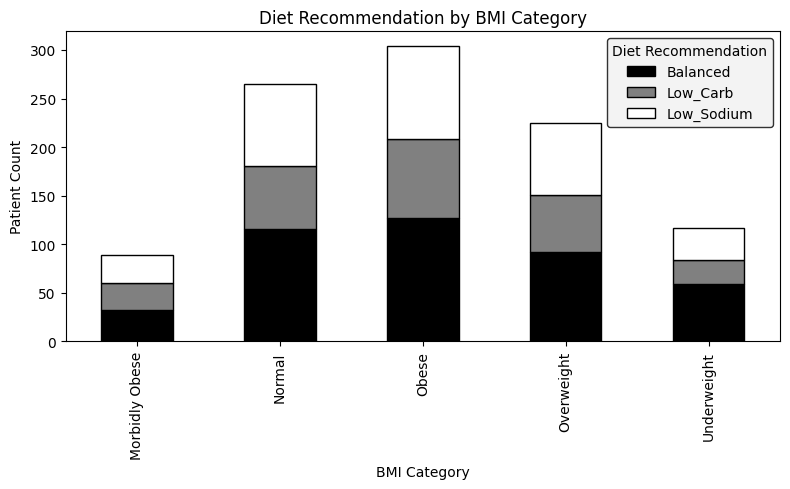

In [59]:
bmi_diet_ct = pd.crosstab(df['BMI_Category'], df['Diet_Recommendation'])

ax = bmi_diet_ct.plot(kind='bar',stacked=True,figsize=(8, 5),colormap='gist_grey', edgecolor="black" )

plt.title("Diet Recommendation by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Patient Count")

leg = plt.legend(title="Diet Recommendation", frameon=True)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_facecolor("#f0f0f0")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Patient Count')

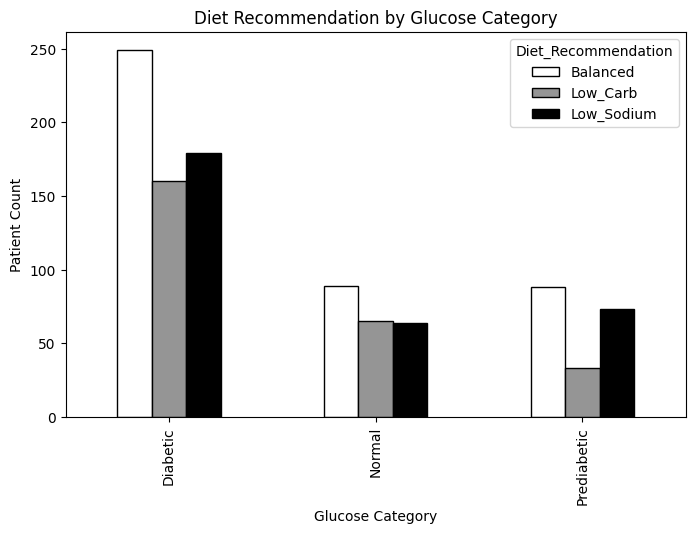

In [61]:
glucose_diet_ct = pd.crosstab(df['Glucose_Category'], df['Diet_Recommendation'])

ax = glucose_diet_ct.plot(kind='bar',figsize=(8, 5),colormap='Greys',edgecolor='black')

plt.title("Diet Recommendation by Glucose Category")
plt.xlabel("Glucose Category")
plt.ylabel("Patient Count")

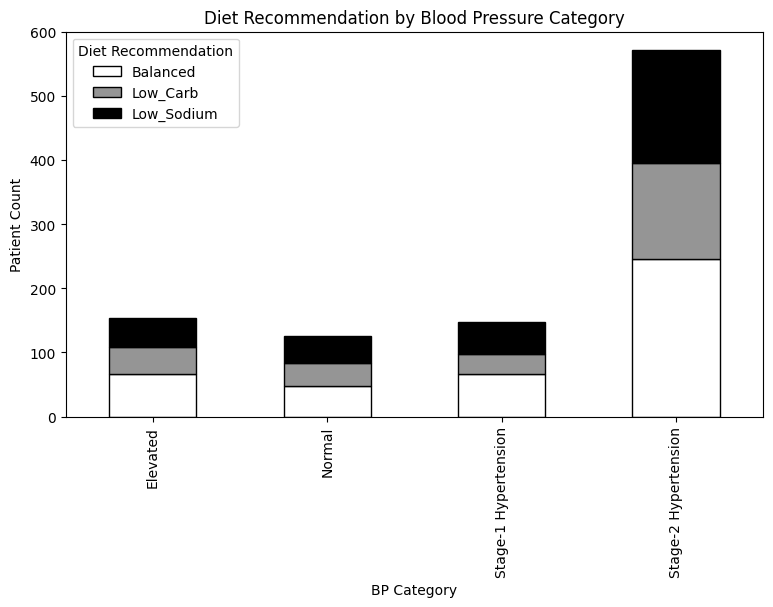

In [62]:
bp_diet_ct = pd.crosstab(df['BP_Category'], df['Diet_Recommendation'])

bp_diet_ct.plot(kind='bar', stacked=True, figsize=(9,5),colormap='Greys',edgecolor='black')
plt.title("Diet Recommendation by Blood Pressure Category")
plt.xlabel("BP Category")
plt.ylabel("Patient Count")
plt.legend(title="Diet Recommendation")
plt.show()

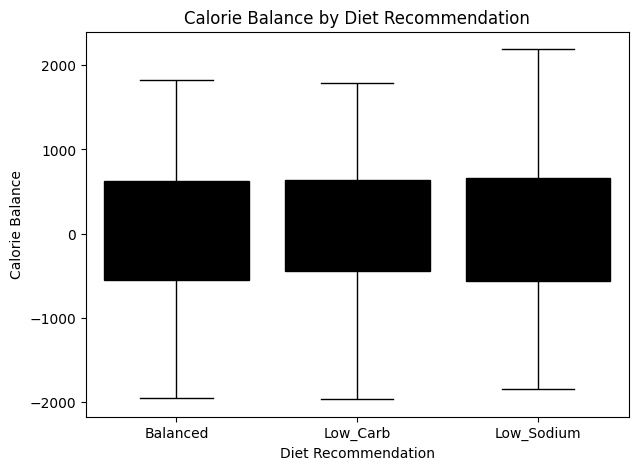

In [64]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Diet_Recommendation', y='Calorie_Balance', color='black',data=df)
plt.title("Calorie Balance by Diet Recommendation")
plt.xlabel("Diet Recommendation")
plt.ylabel("Calorie Balance")
plt.show()

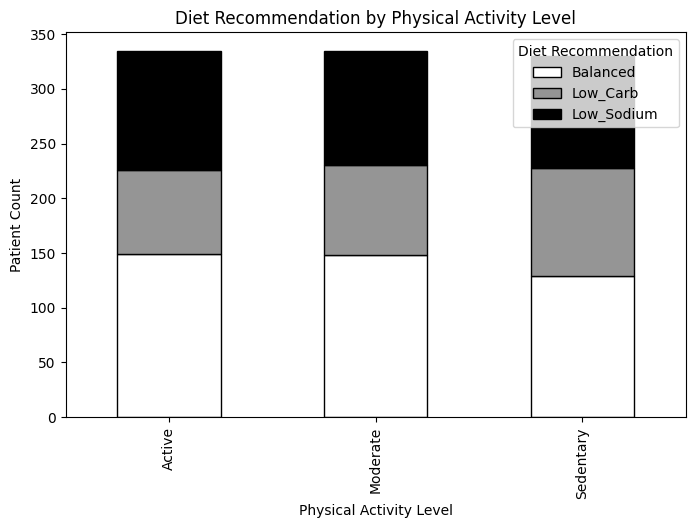

In [63]:
activity_diet_ct = pd.crosstab(df['Physical_Activity_Level'], df['Diet_Recommendation'])

activity_diet_ct.plot(kind='bar', stacked=True, figsize=(8,5),colormap='Greys',edgecolor='black')
plt.title("Diet Recommendation by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Patient Count")
plt.legend(title="Diet Recommendation")
plt.show()

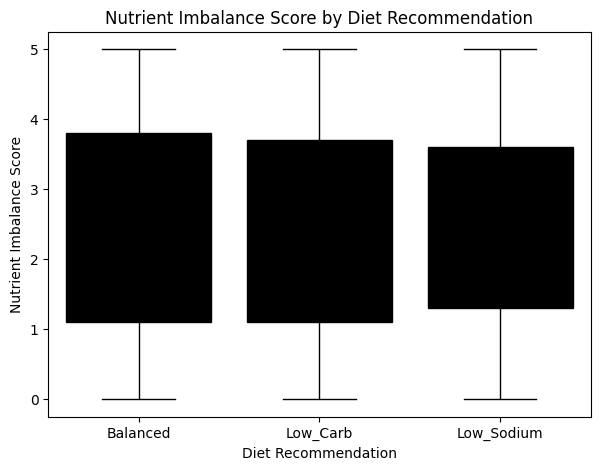

In [65]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Diet_Recommendation',y='Dietary_Nutrient_Imbalance_Score',data=df, color='black')
plt.title("Nutrient Imbalance Score by Diet Recommendation")
plt.xlabel("Diet Recommendation")
plt.ylabel("Nutrient Imbalance Score")
plt.show()

# **Feature Selection**

In [47]:
num_features = ['Age', 'Weight_kg', 'Height_cm', 'BMI', 'Daily_Caloric_Intake',
                'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
                'Weekly_Exercise_Hours', 'BMR', 'TDEE', 'Calorie_Balance',
                'Health_Risk_Score']

cat_features = ['Gender', 'Disease_Type', 'Severity', 'Physical_Activity_Level',
                'Dietary_Restrictions', 'Allergies', 'Preferred_Cuisine',
                'Adherence_to_Diet_Plan', 'Exercise_Category',
                'Sedentary_Risk_Flag', 'Age_Group']

# **Feature & Target**

In [48]:
selected_columns = [col for col in num_features + cat_features if col in df.columns]
X = df[selected_columns]
y = df['Diet_Recommendation']

# **Label Encoding**

In [49]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# **Class Mapping**

In [50]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping)

{'Balanced': np.int64(0), 'Low_Carb': np.int64(1), 'Low_Sodium': np.int64(2)}


# **Pipeline Definning**

In [51]:
num_pipeline = Pipeline([("scaler", StandardScaler())])

cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", num_pipeline, num_features),("cat", cat_pipeline, cat_features)])

# **Train-Test Split**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,
                test_size=0.2,random_state=42,stratify=y_encoded)

# **XG Boost Model**

In [53]:
xgb_model = Pipeline([("preprocessor", preprocessor),("classifier", XGBClassifier(
            objective="multi:softprob",num_class=len(label_encoder.classes_),
            n_estimators=300,max_depth=6,learning_rate=0.05,subsample=0.8,
            colsample_bytree=0.8,eval_metric="mlogloss",random_state=42))])

# **Model Fitting**

In [54]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight_kg',
                                                   'Height_cm', 'BMI',
                                                   'Daily_Caloric_Intake',
                                                   'Cholesterol_mg/dL',
                                                   'Blood_Pressure_mmHg',
                                                   'Glucose_mg/dL',
                                                   'Weekly_Exercise_Hours',
                                                   'BMR', 'TDEE',
                                                   'Calorie_Balance',
                                                   'Health_Risk_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHo...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None, num_class=3, ...))])

# **Model Prediction & Evaluation Metrics**

In [55]:
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.765

Classification Report:
               precision    recall  f1-score   support

    Balanced       0.76      0.65      0.70        85
    Low_Carb       1.00      1.00      1.00        52
  Low_Sodium       0.61      0.73      0.66        63

    accuracy                           0.77       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.78      0.77      0.77       200



# **Confusion Matrix Heatmap**

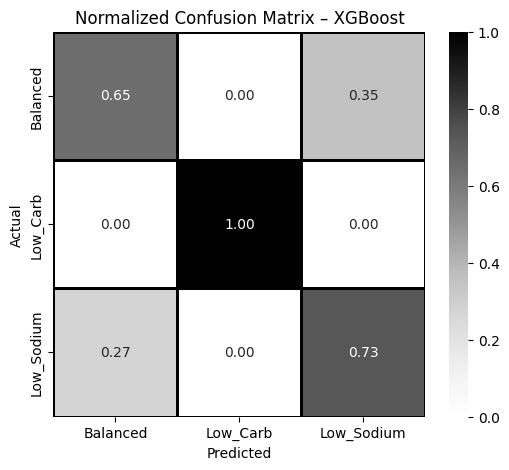

In [56]:
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True, fmt=".2f", cmap="Greys", linewidths=0.8, linecolor="black", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix – XGBoost")
plt.show()

# **Top 5 Features**

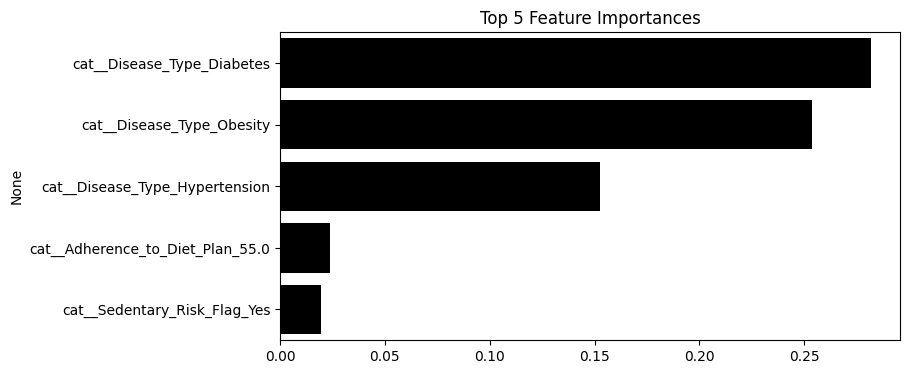

In [66]:
xgb_clf = xgb_model.named_steps["classifier"]
feature_names = xgb_model.named_steps["preprocessor"].get_feature_names_out()

importances = pd.Series(xgb_clf.feature_importances_,index=feature_names).sort_values(ascending=False)[:5]

plt.figure(figsize=(8,4))
sns.barplot(x=importances.values, y=importances.index, color='black')
plt.title("Top 5 Feature Importances")
plt.show()

# **Export pkl file**

In [58]:
joblib.dump(xgb_model, "xgb_diet_model.pkl")
joblib.dump(label_encoder, "diet_label_encoder.pkl")
model_columns = X_train.columns.tolist()
joblib.dump(model_columns, "diet_model_columns.pkl")

print(os.listdir())

['.config', 'diet_label_encoder.pkl', 'Diet_Recommendation_df.csv', 'diet_model_columns.pkl', 'xgb_diet_model.pkl', 'sample_data']


--------
--------